In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel("new_car_price_data.xlsx")

In [4]:
df.head(10)

,price,HP,enginesize,peakrpm,cylindernumber
0,13495.000,111,130,5000,4
1,16500.000,111,130,5000,4
2,16500.000,154,152,5000,6
3,13950.000,102,109,5500,4
4,17450.000,115,136,5500,5
5,15250.000,110,136,5500,5
6,17710.000,110,136,5500,5
7,18920.000,110,136,5500,5
8,23875.000,140,131,5500,5
9,17859.167,160,131,5500,5


In [5]:
df.dtypes

price             float64
HP                  int64
enginesize          int64
peakrpm             int64
cylindernumber      int64
dtype: object

In [6]:
df.isnull().sum()

price             0
HP                0
enginesize        0
peakrpm           0
cylindernumber    0
dtype: int64

In [7]:
#no missing values found

In [8]:
df.shape

(205, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   HP              205 non-null    int64  
 2   enginesize      205 non-null    int64  
 3   peakrpm         205 non-null    int64  
 4   cylindernumber  205 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 8.1 KB


In [10]:
df.corr()

,price,HP,enginesize,peakrpm,cylindernumber
price,1.000000,0.808139,0.874145,-0.085267,0.718305
HP,0.808139,1.000000,0.809769,0.131073,0.692016
enginesize,0.874145,0.809769,1.000000,-0.244660,0.846031
peakrpm,-0.085267,0.131073,-0.244660,1.000000,-0.124172
cylindernumber,0.718305,0.692016,0.846031,-0.124172,1.000000


<Axes: >

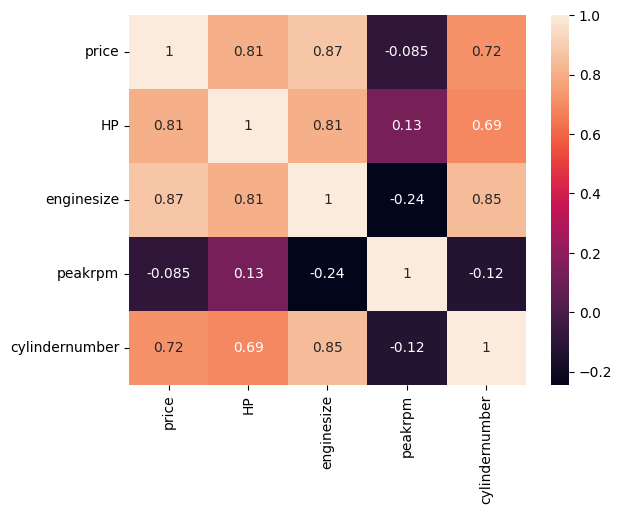

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
#checking the correlation of all the columns against price

In [13]:
df.corr()['price'].sort_values()

peakrpm          -0.085267
cylindernumber    0.718305
HP                0.808139
enginesize        0.874145
price             1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='HP'>

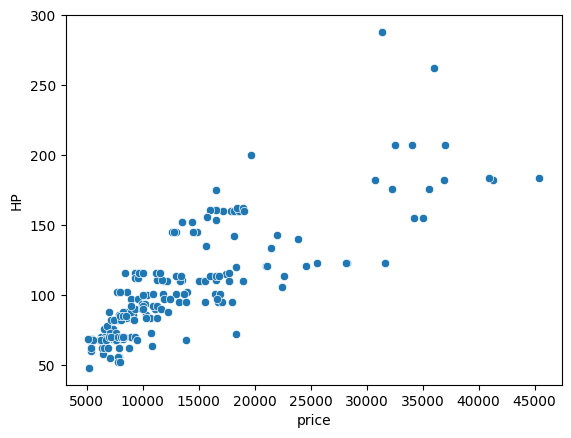

In [14]:
sns.scatterplot(data=df, x='price', y='HP')

<Axes: xlabel='price', ylabel='enginesize'>

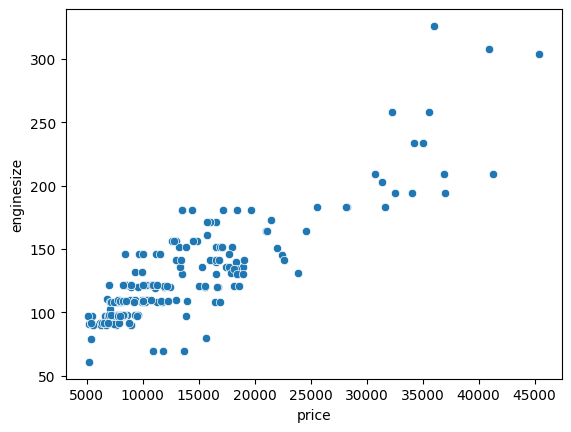

In [15]:
sns.scatterplot(data=df, x='price', y='enginesize')

<Axes: xlabel='price', ylabel='cylindernumber'>

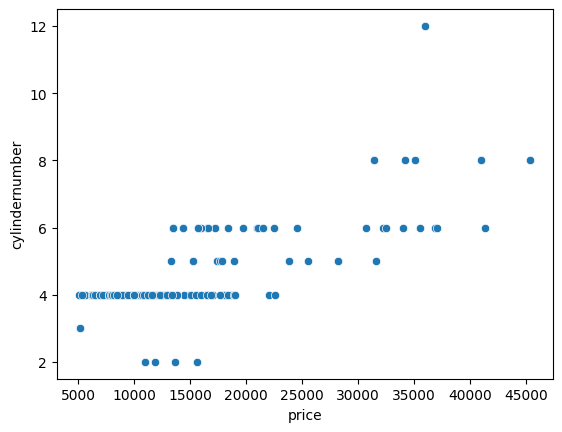

In [16]:
sns.scatterplot(data=df, x='price', y='cylindernumber')

<Axes: xlabel='price', ylabel='peakrpm'>

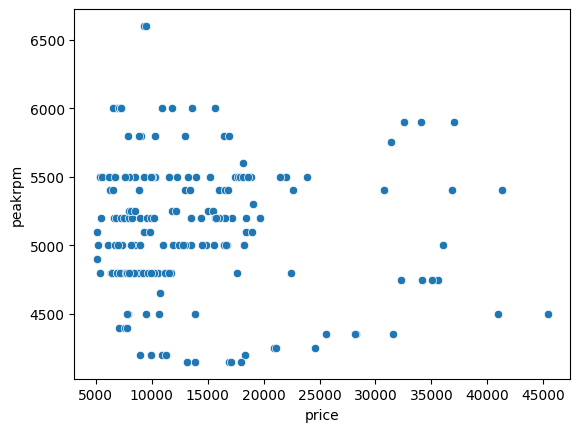

In [17]:
sns.scatterplot(data=df, x='price', y='peakrpm')

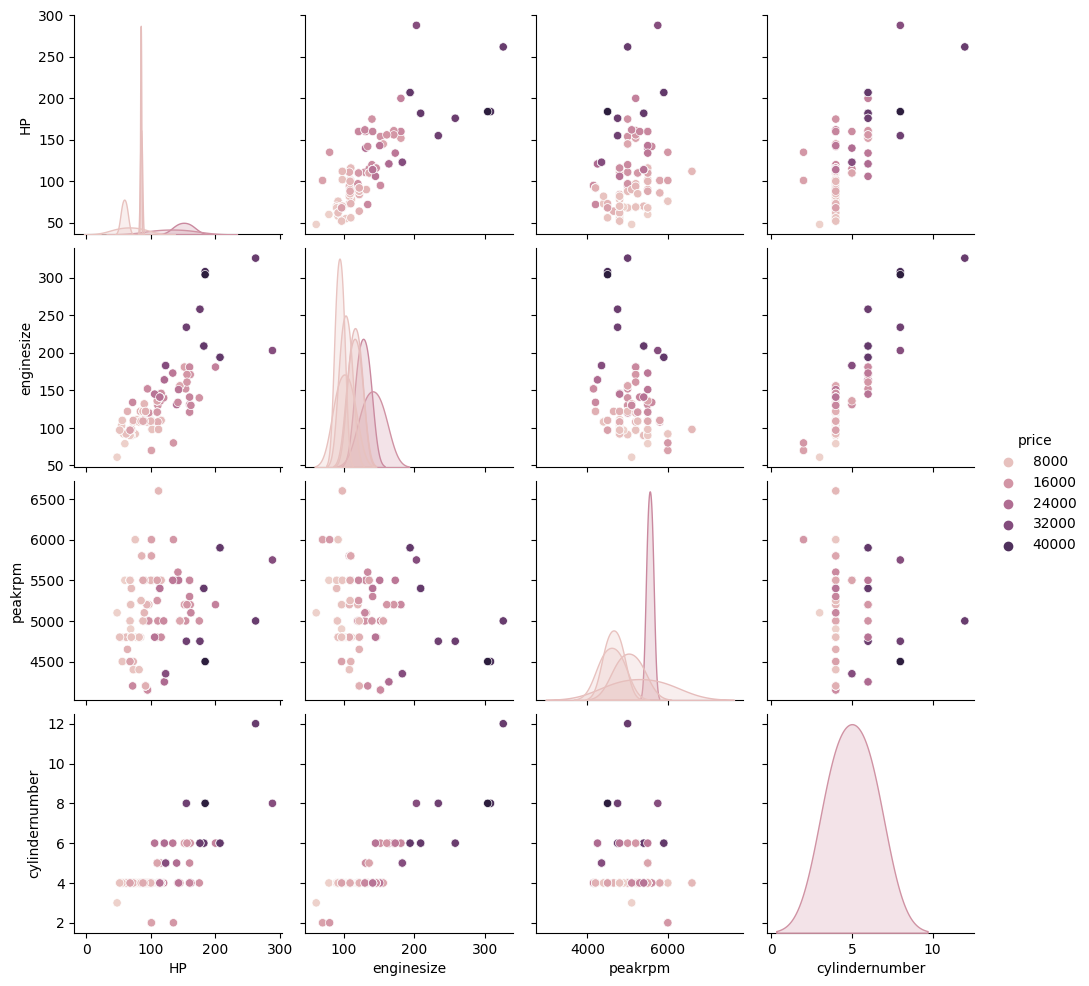

In [18]:
sns.pairplot(data=df, hue='price')

In [19]:
#splitting the data into train and test

In [20]:
X=df.drop('price', axis=1)
y=df['price']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [23]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [24]:
def model(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    score=r2_score(y_test,y_pred)
    
    print(f"Mean Absolue Error = {mae}")
    print(f"Mean Squared Error = {mse}")
    print(f"Root Mean Squared Error = {rmse}")
    print(f"R2 Score = {score}")


In [25]:
#linear regression

In [28]:
lr=LinearRegression()
model(lr)

Mean Absolue Error = 2226.841317546738
Mean Squared Error = 10597122.193907414
Root Mean Squared Error = 3255.322133661646
R2 Score = 0.8448713805488035
